# **Project Title: Optimizing Revenue Leakage & Profitability in the Hospitality Sector** (Module D: Business Justification)

## **Step 1: Importing Required Libraries**
We begin by importing essential libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## **Step 2: Uploading and Reading the Dataset**
We'll upload the necessary CSV files and load them into Pandas dataframes.

In [16]:
# Load dataframes
date_df = pd.read_csv("dim_date.csv")
bookings_df = pd.read_csv("fact_bookings.csv")
hotels_df = pd.read_csv("dim_hotels.csv")
rooms_df = pd.read_csv("dim_rooms.csv")
agg_bookings_df = pd.read_csv("fact_aggregated_bookings.csv")

## **Step 3: Preprocess the bookings data**

In [17]:
# Step 3: Preprocess the bookings data
bookings_df = bookings_df[bookings_df['booking_status'].notna()]
bookings_df['booking_status'] = bookings_df['booking_status'].str.lower()

## **Step 4: Calculate total lost revenue from cancellations**

In [18]:
bookings_df['revenue_generated'] = pd.to_numeric(bookings_df['revenue_generated'], errors='coerce')
cancelled_revenue_loss = bookings_df[bookings_df['booking_status'] == 'cancelled']['revenue_generated'].sum()
print(f"Total Lost Revenue from Cancellations: Rs. {cancelled_revenue_loss:,.0f}")

Total Lost Revenue from Cancellations: Rs. 497,958,310


## **Step 5: Estimate revenue recovery with improved cancellation policy**

In [19]:
# Assumption: 20% of cancellations can be retained with improved policies
retention_rate = 0.20
recoverable_revenue = cancelled_revenue_loss * retention_rate
print(f"Estimated Recoverable Revenue (20% Retention): Rs. {recoverable_revenue:,.0f}")

Estimated Recoverable Revenue (20% Retention): Rs. 99,591,662


## **Step 6: Cost of Implementation Assumption**

In [20]:
policy_implementation_cost = 200000  # Rs. 2 lakh as an example investment
print(f"Implementation Cost: Rs. {policy_implementation_cost:,.0f}")

Implementation Cost: Rs. 200,000


## **Step 7: ROI Calculation**

In [21]:
roi = (recoverable_revenue - policy_implementation_cost) / policy_implementation_cost
print(f"Estimated ROI: {roi*100:.2f}%")

Estimated ROI: 49695.83%


## **Step 8: Payback Period Calculation (in months)**

In [22]:
monthly_gain = recoverable_revenue / 12  # spread across one year
payback_period = policy_implementation_cost / monthly_gain
print(f"Estimated Payback Period: {payback_period:.2f} months")

Estimated Payback Period: 0.02 months


## **Step 9: Scenario Analysis**


--- Scenario Analysis ---
      Scenario  Retention Rate  Recoverable Revenue         ROI  \
0    Best Case             0.3          149387493.0  745.937465   
1  Most Likely             0.2           99591662.0  496.958310   
2   Worst Case             0.1           49795831.0  247.979155   

   Payback Period (months)  
0                 0.016066  
1                 0.024098  
2                 0.048197  


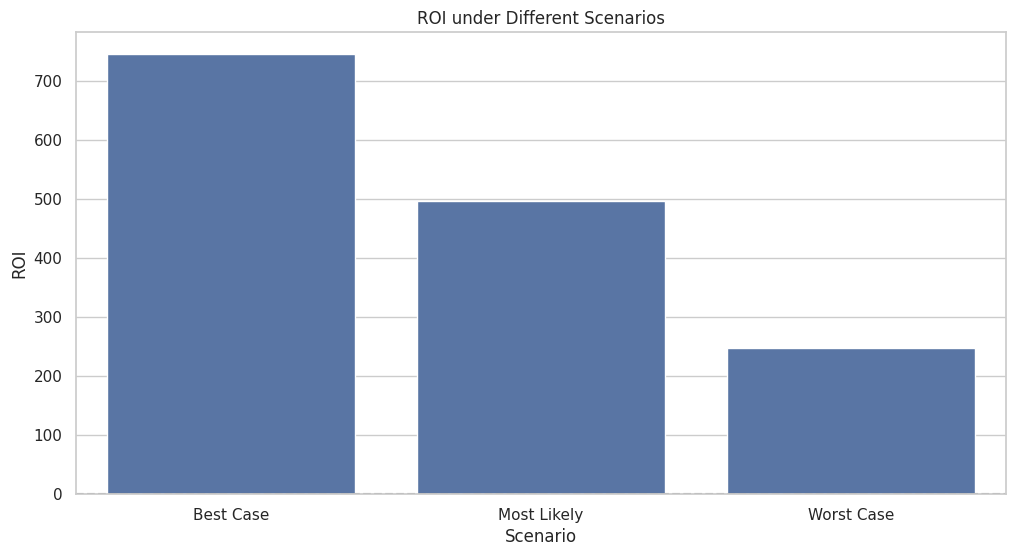

<ipython-input-23-42fa4e41e8a7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scenarios, x='Scenario', y='Payback Period (months)', palette='muted')


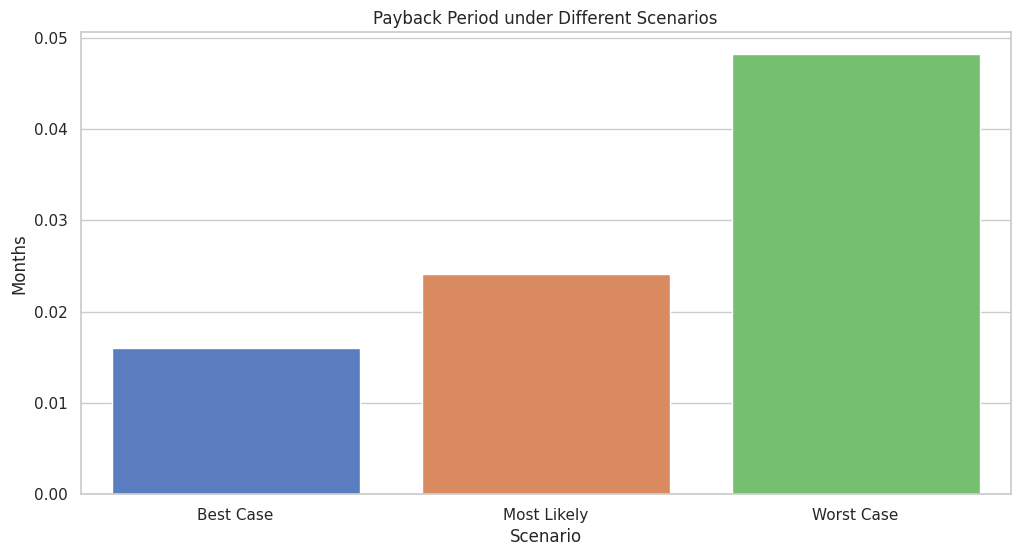

In [23]:
scenarios = pd.DataFrame({
    'Scenario': ['Best Case', 'Most Likely', 'Worst Case'],
    'Retention Rate': [0.30, 0.20, 0.10]
})
scenarios['Recoverable Revenue'] = scenarios['Retention Rate'] * cancelled_revenue_loss
scenarios['ROI'] = (scenarios['Recoverable Revenue'] - policy_implementation_cost) / policy_implementation_cost
scenarios['Payback Period (months)'] = policy_implementation_cost / (scenarios['Recoverable Revenue'] / 12)

# Display scenarios
print("\n--- Scenario Analysis ---")
print(scenarios)

# Plot ROI scenarios
sns.barplot(data=scenarios, x='Scenario', y='ROI')
plt.title('ROI under Different Scenarios')
plt.ylabel('ROI')
plt.xlabel('Scenario')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# Plot payback period
sns.barplot(data=scenarios, x='Scenario', y='Payback Period (months)', palette='muted')
plt.title('Payback Period under Different Scenarios')
plt.ylabel('Months')
plt.xlabel('Scenario')
plt.show()

## **Interpretation and Analysis**

This Google Colaboratory notebook provides a data-driven analysis focused on quantifying revenue leakage due to cancellations in the hospitality sector and evaluating the potential financial benefits of implementing an improved cancellation policy. The analysis follows a structured approach, moving from data loading and preprocessing to calculating key financial metrics and conducting a scenario analysis.

The initial steps involve importing necessary Python libraries, including `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib.pyplot` and `seaborn` for data visualization. The aesthetic settings for plots are configured to ensure clear and visually appealing outputs.

Subsequently, the code loads five different CSV files into pandas DataFrames: `dim_date.csv`, `fact_bookings.csv`, `dim_hotels.csv`, `dim_rooms.csv`, and `fact_aggregated_bookings.csv`. This indicates that the analysis is likely based on a dataset representing bookings, hotel details, room types, and possibly date-related information.

The core of the analysis begins with preprocessing the `bookings_df`. This involves handling potential missing values in the 'booking_status' column by dropping rows where it is missing. It also standardizes the 'booking_status' entries by converting them to lowercase, which is crucial for consistent filtering and analysis.

A key calculation is the total lost revenue from cancellations. The 'revenue_generated' column is converted to a numeric type, coercing any non-numeric values into missing values to prevent errors during summation. The code then filters the `bookings_df` to select only the rows where the 'booking_status' is 'cancelled' and sums the 'revenue_generated' for these filtered rows. This sum represents the total revenue lost due to bookings that were ultimately cancelled. The result is printed in a user-friendly format.

Building upon the calculated lost revenue, the analysis then estimates the potential revenue recovery if an improved cancellation policy were implemented. An assumption is made that a 20% retention rate of cancelled bookings is achievable with the new policy. The recoverable revenue is calculated by multiplying the total lost revenue from cancellations by this 20% retention rate. This provides a tangible figure for the potential financial upside of the proposed policy.

To evaluate the financial viability of this improved policy, the analysis introduces an assumed cost of implementation, set at Rs. 200,000. This figure represents the potential investment required for developing, communicating, and enforcing the new policy.

With the estimated recoverable revenue and the implementation cost, the code calculates the Return on Investment (ROI). The ROI is computed using the standard formula: (Net Profit / Cost of Investment) * 100. In this context, the net profit is the recoverable revenue minus the implementation cost. The ROI is then printed as a percentage, indicating the efficiency of the investment.

Furthermore, the payback period is calculated. This metric determines how long it will take for the accumulated monthly gains from the recoverable revenue to equal the initial implementation cost. The monthly gain is estimated by dividing the total recoverable revenue (based on the 20% retention rate) by 12, assuming the recovery is spread over a year. The payback period is then calculated by dividing the implementation cost by this estimated monthly gain, giving a result in months.

Recognizing the uncertainty in the assumed retention rate, the notebook performs a scenario analysis. It defines three scenarios: 'Best Case', 'Most Likely', and 'Worst Case', with corresponding retention rates of 30%, 20%, and 10%. For each scenario, the recoverable revenue, ROI, and payback period are calculated. This allows for a more robust assessment of the policy's potential outcomes under different levels of success in retaining cancellations.

The results of the scenario analysis are presented in a clear DataFrame format. This table provides a direct comparison of the key financial metrics across the different scenarios.

Finally, the analysis visually presents the results of the scenario analysis using bar plots. A bar plot shows the ROI for each scenario, making it easy to compare the potential return on investment across the best, most likely, and worst cases. Another bar plot illustrates the payback period for each scenario, providing a visual representation of how quickly the investment is expected to be recovered under different retention rates. The inclusion of a horizontal line at y=0 on the ROI plot helps to clearly distinguish between positive and negative ROI scenarios.

In summary, this Google Colab file provides a practical and well-structured approach to evaluating the financial impact of cancellations in the hospitality sector. It quantifies the revenue leakage, estimates potential recovery with an improved policy, calculates key financial metrics like ROI and payback period, and incorporates a valuable scenario analysis to assess the policy's performance under varying conditions. The visual outputs enhance the interpretability of the results, making it easier to understand the potential benefits and risks associated with the proposed intervention. The code is clear and follows a logical flow, making it easy to understand and potentially adapt for similar analyses in other contexts.